In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import glob
import os
import librosa
import numpy as np
import pandas as pd
from librosa.feature import melspectrogram

/kaggle/input/savedmodel/CNN_model.pkl
/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8

In [14]:
 import librosa
import numpy as np
y, sr = librosa.load("/kaggle/input/urbansound8k/fold1/101415-3-0-8.wav")
D = librosa.stft(y)

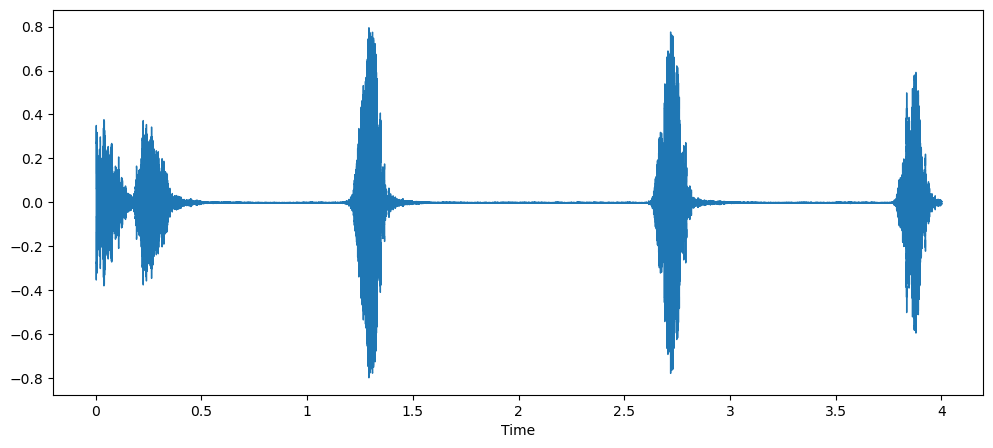

In [18]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
data, sample_rate = librosa.load("/kaggle/input/urbansound8k/fold1/101415-3-0-8.wav")
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

# Saving all folds in one file

In [19]:
metadata = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [23]:
import pandas as pd
metadata = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head(10)
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
def LOG_MEL_SPEC2(parent_dir,sub_dirs):
    labels = []
    log_mel_spectrogram=[]
    for index_num,row in tqdm(metadata.iterrows()):
      file_name = os.path.join(os.path.abspath('/kaggle/input/urbansound8k/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
      final_class_labels=row["classID"]
      labels.append(final_class_labels)
      f, sr = librosa.load(file_name,sr=44100)
      three_sec_samples=3*sr
      if(len(f)>=three_sec_samples):
                f1 = f[:three_sec_samples]
                log_mel_spec = librosa.power_to_db(melspectrogram(y=f1, sr=44100, n_fft=1034, hop_length=1034))
                # Log Mel spectograms of first 3 secs 
      else:                               
                #If audio is not 3 sec repeat pad until its 3 secs long
                while(len(f)<three_sec_samples):          
                    f=np.concatenate((f, f))
                f1 = f[:three_sec_samples]
                log_mel_spec = librosa.power_to_db(melspectrogram(y=f1, sr=44100, n_fft=1034, hop_length=1034))
      log_mel_spectrogram.append(log_mel_spec)
    return np.array(log_mel_spectrogram), np.array(labels,dtype = np.int)
def encode(labels):
    # One hot encoding of labels
    labels_total = len(labels)
    unique_labels_total = len(np.unique(labels))
    one_hot_encoded = np.zeros((labels_total,unique_labels_total))
    one_hot_encoded[np.arange(labels_total), labels] = 1
    return one_hot_encoded

def file_Creater(final_path,filename):
    new_path = os.path.join(os.getcwd(), final_path)
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    return os.path.join(final_path, filename)

We save all the folds to one file of features and one file of labels.

In [24]:
parent_directory = '/kaggle/input/urbansound8k' # Where you have saved the UrbanSound8K data set"   
final_dir="/kaggle/working/UrbanSound8K_Processed"
feature_file = file_Creater(final_dir, 'allfolds_features_x.npy')
labels_file = file_Creater(final_dir,'allfolds_labels_y.npy')
features, labels = LOG_MEL_SPEC2(parent_directory, ['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10'])
print(features)
labels_encoded = encode(labels)
np.save(feature_file, features)
print ("DONE... " + feature_file)
np.save(labels_file, labels_encoded)
print ("DONE... " + labels_file)


8732it [06:14, 23.31it/s]
/tmp/ipykernel_32/1237779804.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(log_mel_spectrogram), np.array(labels,dtype = np.int)


[[[-48.49675  -54.047806 -47.55767  ... -42.760254 -40.39741  -41.204384]
  [-47.19471  -44.157036 -45.467396 ... -42.197845 -39.59556  -41.828384]
  [-44.95733  -39.63306  -42.685795 ... -40.6629   -37.806984 -42.17886 ]
  ...
  [-56.978573 -56.978573 -45.803722 ... -48.374672 -43.925224 -44.33869 ]
  [-56.978573 -56.978573 -55.69468  ... -47.896492 -44.97574  -49.25447 ]
  [-56.978573 -56.978573 -54.865723 ... -48.61343  -51.567993 -53.944374]]

 [[-27.884876 -14.836245 -25.594273 ... -34.472805 -24.078632 -15.873532]
  [-28.346466 -15.742405 -27.320778 ... -29.292639 -24.49211  -16.567204]
  [-28.348755 -16.812294 -32.3211   ... -25.36732  -24.39872  -17.080418]
  ...
  [-71.35036  -91.99053  -91.99053  ... -91.28433  -91.83481  -88.92356 ]
  [-71.52452  -91.6765   -91.99053  ... -91.2531   -91.31019  -91.99053 ]
  [-71.47548  -91.21048  -91.074135 ... -91.99053  -91.99053  -91.99053 ]]

 [[-35.56584  -20.606363 -15.221883 ... -23.901821 -18.962955 -19.445045]
  [-35.14934  -18.3710

In [25]:
import os

def list_files(directory):
  files = os.listdir(directory)
  return files

if __name__ == '__main__':
  files = list_files('/kaggle/working')
  for file in files:
   print(file+':')
   files2 = list_files('/kaggle/working/'+file)
   for file in files2:
        print(file)
    


UrbanSound8K_Processed:
allfolds_labels_y.npy
allfolds_features_x.npy
.virtual_documents:


In [11]:
ds= pd.read_csv('../input/urbansound8k/UrbanSound8K.csv')

print(type(ds['slice_file_name'][1]))
ds

<class 'str'>


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [28]:
import glob
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sn
import pandas as pd
from librosa.feature import melspectrogram
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,Conv2D
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split
import pickle


In [27]:
pip install librosa --upgrade


Note: you may need to restart the kernel to use updated packages.


In [31]:
X = np.load("/kaggle/working/UrbanSound8K_Processed/allfolds_features_x.npy")
Y = np.load("/kaggle/working/UrbanSound8K_Processed/allfolds_labels_y.npy")

In [32]:
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [33]:
X_train_i, X_test, y_train_i, y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train_i, y_train_i, test_size=0.25)

In [35]:
frames = 128
bands = 128
feature_size = frames* bands 
num_channels = 1
num_labels = 10 # number of output predictions
def build_model():
  f_size = 5
  model = Sequential()
  model.add(Convolution2D(24, (f_size, f_size), strides=(1,1), padding='valid', input_shape=(bands, frames, num_channels)))
  model.add(MaxPooling2D(pool_size=(4, 2)))
  model.add(Activation('relu'))
  model.add(Convolution2D(48, (5, 5), strides=(1,1), padding='valid'))
  model.add(MaxPooling2D(pool_size=(4, 2)))
  model.add(Activation('relu'))
  model.add(Convolution2D(48, (5, 5), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(64, kernel_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.5))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="SGD")
  return model


In [ ]:
print("Building model...")
model = build_model()
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size=100, epochs=200)


Building model...
Epoch 1/200
53/53 [==============================] - 56s 1s/step - loss: 2.7570 - accuracy: 0.1313 - val_loss: 2.3658 - val_accuracy: 0.2318
Epoch 2/200
53/53 [==============================] - 55s 1s/step - loss: 2.3795 - accuracy: 0.1670 - val_loss: 2.3112 - val_accuracy: 0.2570
Epoch 3/200
53/53 [==============================] - 55s 1s/step - loss: 2.3345 - accuracy: 0.1972 - val_loss: 2.2428 - val_accuracy: 0.2667
Epoch 4/200
53/53 [==============================] - 55s 1s/step - loss: 2.2973 - accuracy: 0.2132 - val_loss: 2.1832 - val_accuracy: 0.3366
Epoch 5/200
53/53 [==============================] - 56s 1s/step - loss: 2.2611 - accuracy: 0.2279 - val_loss: 2.1574 - val_accuracy: 0.3509
Epoch 6/200
53/53 [==============================] - 56s 1s/step - loss: 2.2282 - accuracy: 0.2509 - val_loss: 2.2048 - val_accuracy: 0.2255
Epoch 7/200
53/53 [==============================] - 55s 1s/step - loss: 2.2221 - accuracy: 0.2497 - val_loss: 2.0956 - val_accuracy: 0.

In [83]:
model.save('/kaggle/working/')

In [102]:
import pickle
# Save the Modle to file in the current working directory
Pkl_Filename = "soundClfModel.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

In [ ]:
import pickle
with open("/kaggle/input/savedmodel/CNN_model.pkl", 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

In [ ]:
result=Pickled_LR_Model.predict(X_test)

In [106]:
print("Evaluating model...")
y_pred = np.argmax(Pickled_LR_Model.predict(X_test, verbose=0),1)
y_true = np.argmax(y_test, 1)

Evaluating model...


<Axes: >

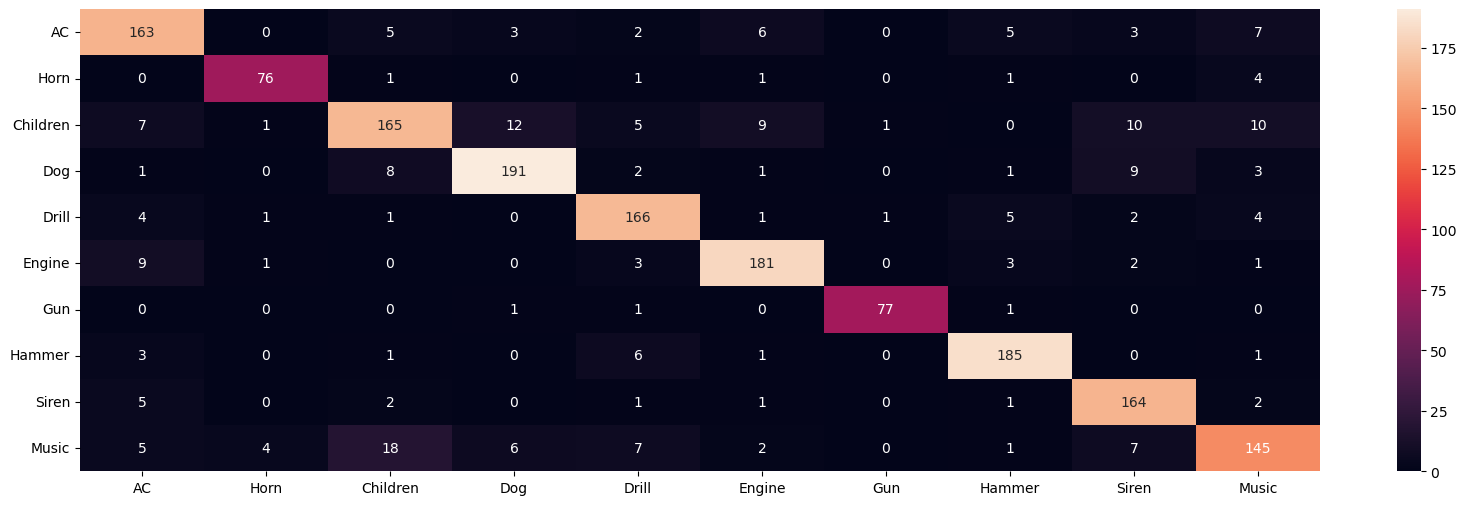

In [109]:
classes = ["AC","Horn","Children","Dog","Drill","Engine","Gun","Hammer","Siren","Music"] 
df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), classes, classes)
plt.figure(figsize=(20,6))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='g')

Evaluating model...
55/55 [==============================] - 5s 99ms/step - loss: 0.6718 - accuracy: 0.8661

Accuracy = 0.8660560846328735


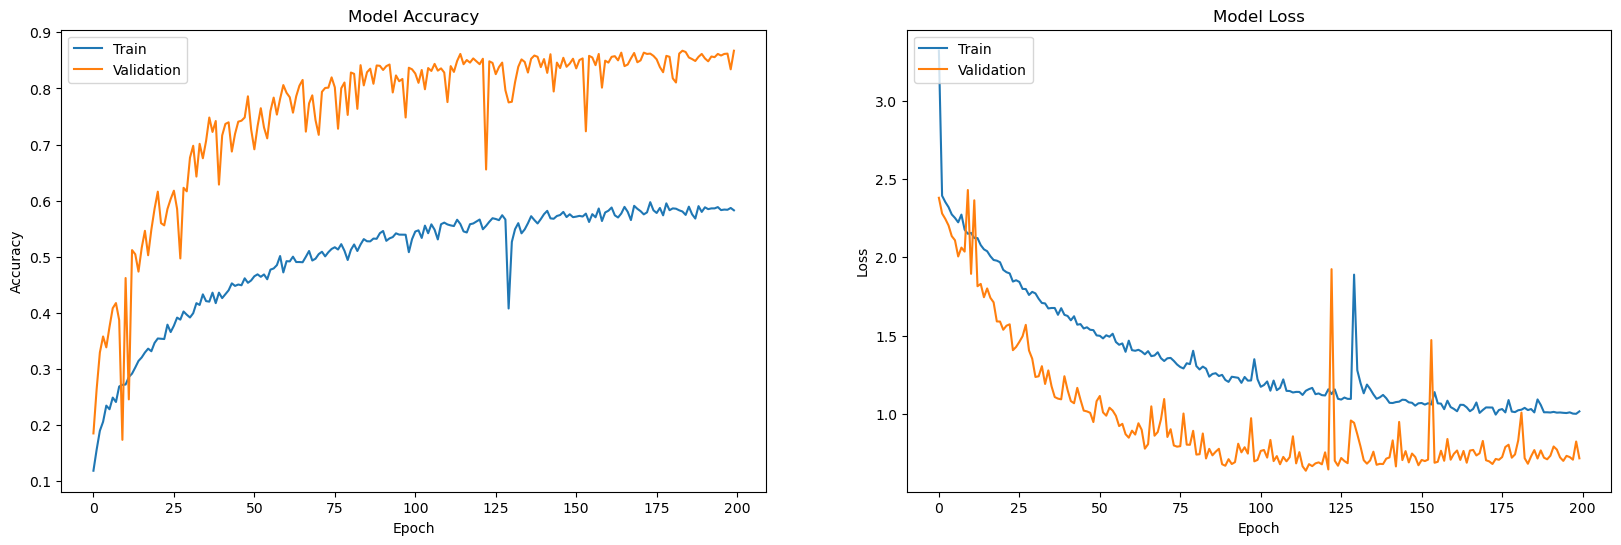

<Axes: >

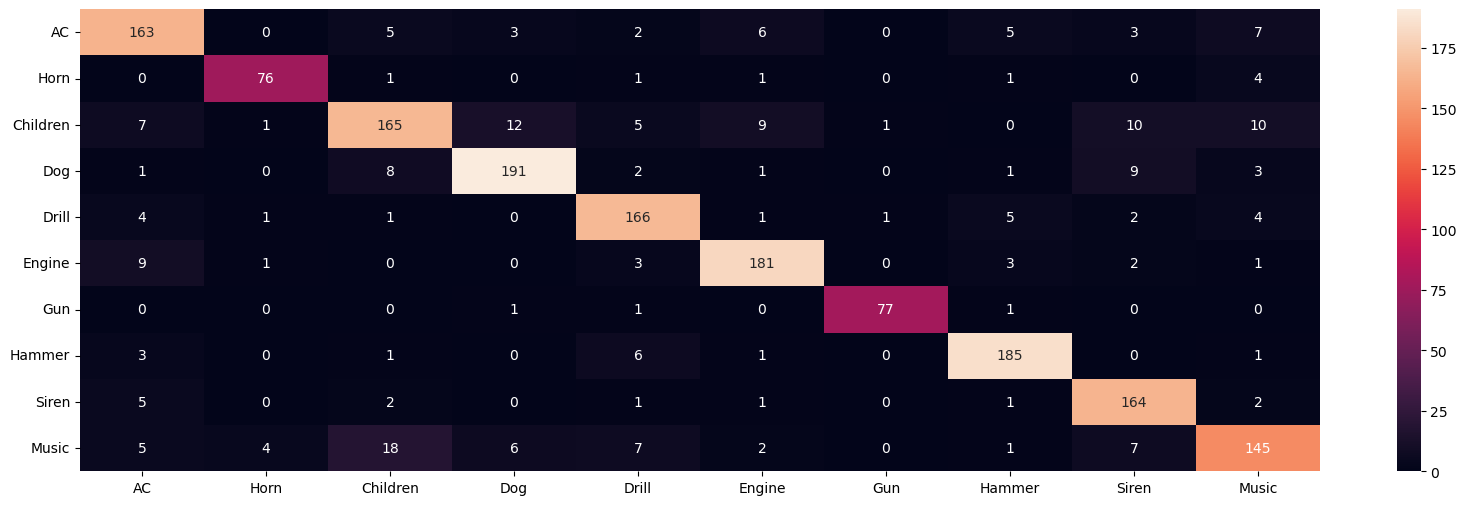

In [104]:
print("Evaluating model...")
y_pred = np.argmax(result.predict(X_test, verbose=0),1)
y_true = np.argmax(y_test, 1)
accuracy = model.evaluate(X_test, y_test, batch_size=32)[1]
print("\nAccuracy = "+str(accuracy))

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

classes = ["AC","Horn","Children","Dog","Drill","Engine","Gun","Hammer","Siren","Music"] 
df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), classes, classes)
plt.figure(figsize=(20,6))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='g')